# Итоговый проект "Стримчик"

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании необходимо выявить закономерности. Нам предоставлены данные до 2016 года, которые могут быть неполными. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

Набор данных для анализа представляет собой таблицу со следующими столбцами:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

**Цель проекта:** выявить определяющие успешность игры закономерности.

**Задачи проекта:**

[1) Подготовить данные;](#section_id1)

[2) Провести исследовательский анализ данных;](#section_id2)

[3) Составить портрет пользователя каждого региона;](#section_id3)

[4) Провести исследование статистических показателей;](#section_id4)

[5) Проверить гипотезы:](#section_id5)

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

## Изучение общей информации

Импортируем необходимые для выполнения проекта библиотеки pandas, matplotlib.pyplot, stats, затем воспользуемся методом read_csv для чтения файлов формата CSV, после просмотрим сводную информацио о таблице с помощью метода info():

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats as st
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу можно заметить наличие пропусков в некоторых столбцах.

Выведем первые 10 строк таблицы для наглядности:

In [3]:
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<a id='section_id1'></a> 
## Подготовка данных  

Приведём все столбцы к нижнему регистру.

Воспользуемся атрибутом columns для вывода названий столбцов:

In [4]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


С помощью метода set_axis изменим названия столбцов:

In [5]:
df = df.rename(columns={"Name": 'name', "Platform": 'platform', "Year_of_Release": 'year_of_release', "Genre": 'genre', "NA_sales": 'na_sales', "EU_sales": 'eu_sales',
     "JP_sales": 'jp_sales', "Other_sales": 'other_sales', "Critic_Score": 'critic_score', "User_Score": 'user_score', "Rating": 'rating'})

Проверим изменения:

In [6]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Преобразуем данные столбца user_score из типа object в float64 (данные в нём принимают численные значения значения от 0 до 10):

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Проверим изменения:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Исходя из таблицы можно заметить, что всего строк 16715, но есть большое количество строк с пропущенными значениями в таких столбцах как: name, year_of_release, genre, critic_score, user_score, rating. Заменить пропуски в столбцах name, genre не представляется возможным, потому что они имеют категориальные значения. В столбцах critic_score и user_score имело бы смысл поставить вместо пропусков медианное значение по выборке (т.к. числа отличаются между собой в разы), но даже с учетом удаления всех строк, где пропущены значения (rating, year_of_release, name) останется значительное количество пропусков в столбцах critic_score и user_score и заполнение их средними значениями сильно скажется на результатах анализа. В столбце year_of_release замена пропусков может привести к неверным результатам. Заменим пропущенные значения в столбце rating на "not_defined", все остальное оставим как есть.

In [9]:
df['rating'] = df['rating'].fillna('not_defined')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Существуют различные причины, которые могли привести к пропускам, это ошибки при загрузке данных, 'человеческий фактор', также у игры может просто не быть пользовательских оценок по причине её непопулярности, малоизвестности или если игра вышла в релиз совсем недавно. Также можно встретить аббревиатуру 'tbd' (to be determined), это значит, что рейтинг пока не определён, в этом случае рэйтинг также останется без изменений.

Посчитаем суммарные продажи во всех регионах и занесём их в отдельный столбец 'sum_sales':

In [10]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_defined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,not_defined,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,not_defined,0.01


<a id='section_id2'></a> 
## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


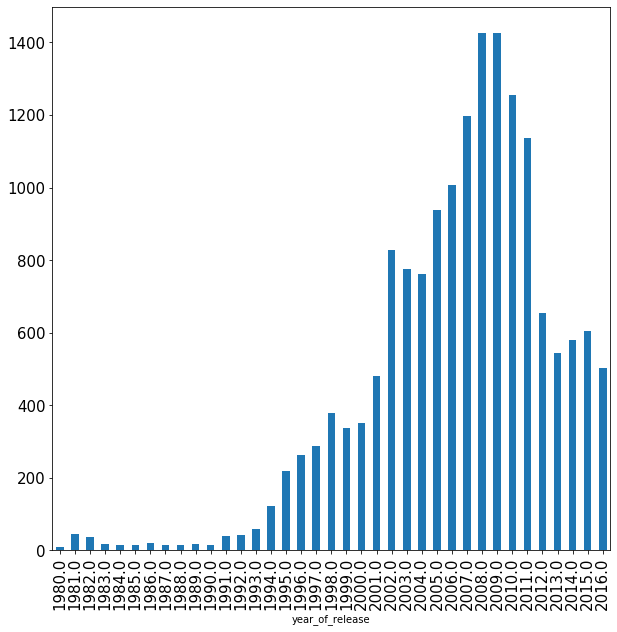

In [11]:
print(df.groupby('year_of_release')['name'].count())
df.groupby('year_of_release')['name'].count().plot(x = 'year_of_release', kind = 'bar', rot=90, figsize=(10,10), fontsize=15)

Исходя из представленных выше результатов можно сделать вывод, что наибольшее количество игр выпускалось в период с 2006 по 2011 годы, пик пришелся на 2008 год, период с 1980 по 1994 можно не учитывать:

year_of_release
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


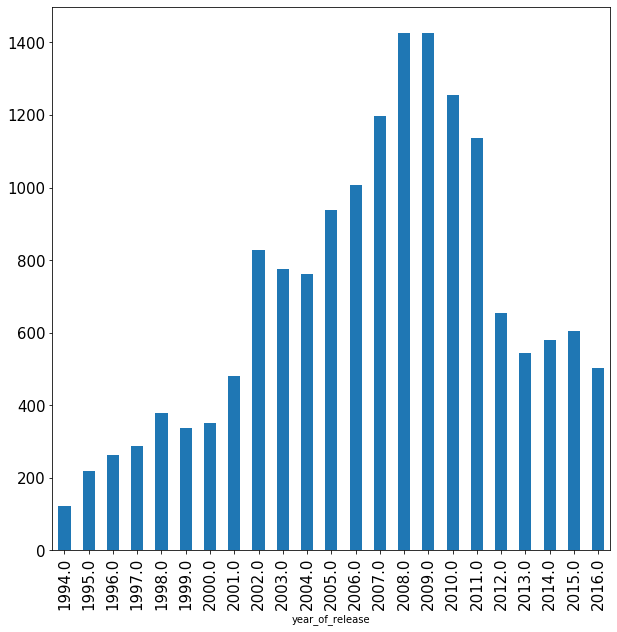

In [12]:
df = df[df['year_of_release'] > 1993]
print(df.groupby('year_of_release')['name'].count())
df.groupby('year_of_release')['name'].count().plot(x = 'year_of_release', kind = 'bar', rot=90, figsize=(10,10), fontsize=15)

Посмотрим, как менялись продажи по платформам. Для начала выберем наиболее популярные платформы:

platform
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SAT      173
WiiU     147
SNES     144
GB        67
DC        52
GEN       12
NG        10
WS         6
SCD        5
3DO        3
TG16       2
PCFX       1
NES        1
Name: sum_sales, dtype: int64


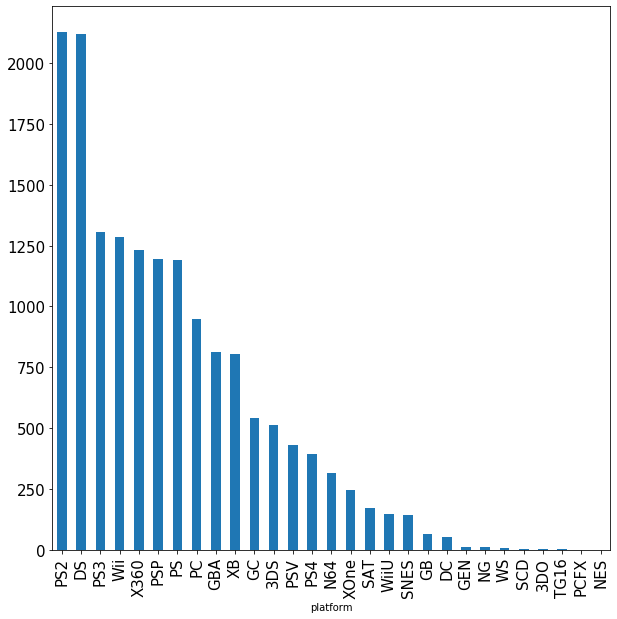

In [13]:
print(df.groupby('platform')['sum_sales'].count().sort_values(ascending = False))
df.groupby('platform')['sum_sales'].count().sort_values(ascending = False).plot(x = 'platform', kind = 'bar', rot=90, figsize=(10,10), fontsize=15)

Не будем учитывать платформы, на которых было выпущено менее 100 игр:

platform
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SAT      173
WiiU     147
SNES     144
Name: sum_sales, dtype: int64


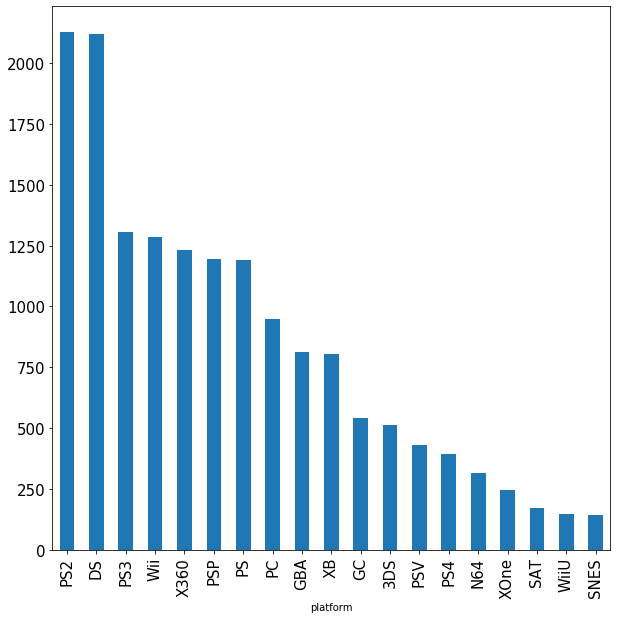

In [14]:
df = df.query('platform != "GB" and platform != "DC" and platform != "GEN" and platform != "NG" and platform != "WS" and platform != "SCD" and platform != "3DO" and platform != "TG16" and platform != "PCFX" and platform != "NES"')
print(df.groupby('platform')['sum_sales'].count().sort_values(ascending = False))
df.groupby('platform')['sum_sales'].count().sort_values(ascending = False).plot(x = 'platform', kind = 'bar', rot=90, figsize=(10,10), fontsize=15)

Построим распределение по годам с помощью сводной таблицы:

In [15]:
table_1 = pd.pivot_table(df, index='year_of_release', values='sum_sales', columns='platform', aggfunc=len, fill_value=0)
table_1

platform,3DS,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,
1994.0,0,0,0,0,0,6,17,0,0,0,0,0,19,53,0,0,0,0,0
1995.0,0,0,0,0,0,2,99,0,0,0,0,0,52,54,0,0,0,0,0
1996.0,0,0,0,0,18,4,164,0,0,0,0,0,38,30,0,0,0,0,0
1997.0,0,0,0,0,49,6,188,0,0,0,0,0,34,4,0,0,0,0,0
1998.0,0,0,0,0,77,8,248,0,0,0,0,0,29,2,0,0,0,0,0
1999.0,0,0,0,0,102,7,200,0,0,0,0,0,1,1,0,0,0,0,0
2000.0,0,0,1,0,60,7,160,82,0,0,0,0,0,0,0,0,0,1,0
2001.0,0,0,107,22,9,15,91,185,0,0,0,0,0,0,0,0,0,33,0
2002.0,0,0,198,152,1,19,20,280,0,0,0,0,0,0,0,0,0,158,0


Посчитаем "время жизни" игровых платформ, для этого уберем из списка слишком старые и все еще актуальные платформы и PC (т.к. платформа не теряет своей актуальности со временем из-за постоянного совершенствования комплектующих):

In [16]:
lt = df.query('platform != "3DS" and platform != "PC" and platform != "PS" and platform != "PS3" and platform != "PS4" and platform != "PSV" and platform != "SAT" and platform != "SNES" and platform != "WiiU" and platform != "X360" and platform != "XOne"')
living_time = lt.groupby('platform')['year_of_release'].max() - lt.groupby('platform')['year_of_release'].min() 
print(living_time)
print()
print("Среднее время актуальности игровой платформы: {} лет".format(living_time.mean()))

platform
DS      9.0
GBA     7.0
GC      6.0
N64     6.0
PS2    11.0
PSP    11.0
Wii    10.0
XB      8.0
Name: year_of_release, dtype: float64

Среднее время актуальности игровой платформы: 8.5 лет


С учетом полученного значения далее будем рассматривать данные только за актуальный период развития игровой индустрии, а именно с 2012 года, когда наблюдалось резкое падение продаж консолей и других игровых устройств более чем на 30%. Падение продаж видеоигр объясняется тем, что потребители стали чаще покупать игры для мобильных устройств, а также играть через социальные сети.

In [17]:
df = df.query('year_of_release > 2011')

Найдём популярные в прошлом платформы, у которых сейчас продажи на нуле:

In [18]:
display(table_1.query('year_of_release == "2016"'))

platform,3DS,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,
2016.0,46,0,0,0,0,54,0,0,38,164,0,85,0,0,1,14,13,0,87


Это такие платформы как: *DS, GBA, GC, N64, PS, PS2, PSP, SAT, SNES, XB, Wii.*

На основе таблицы построим график продаж платформ по годам:

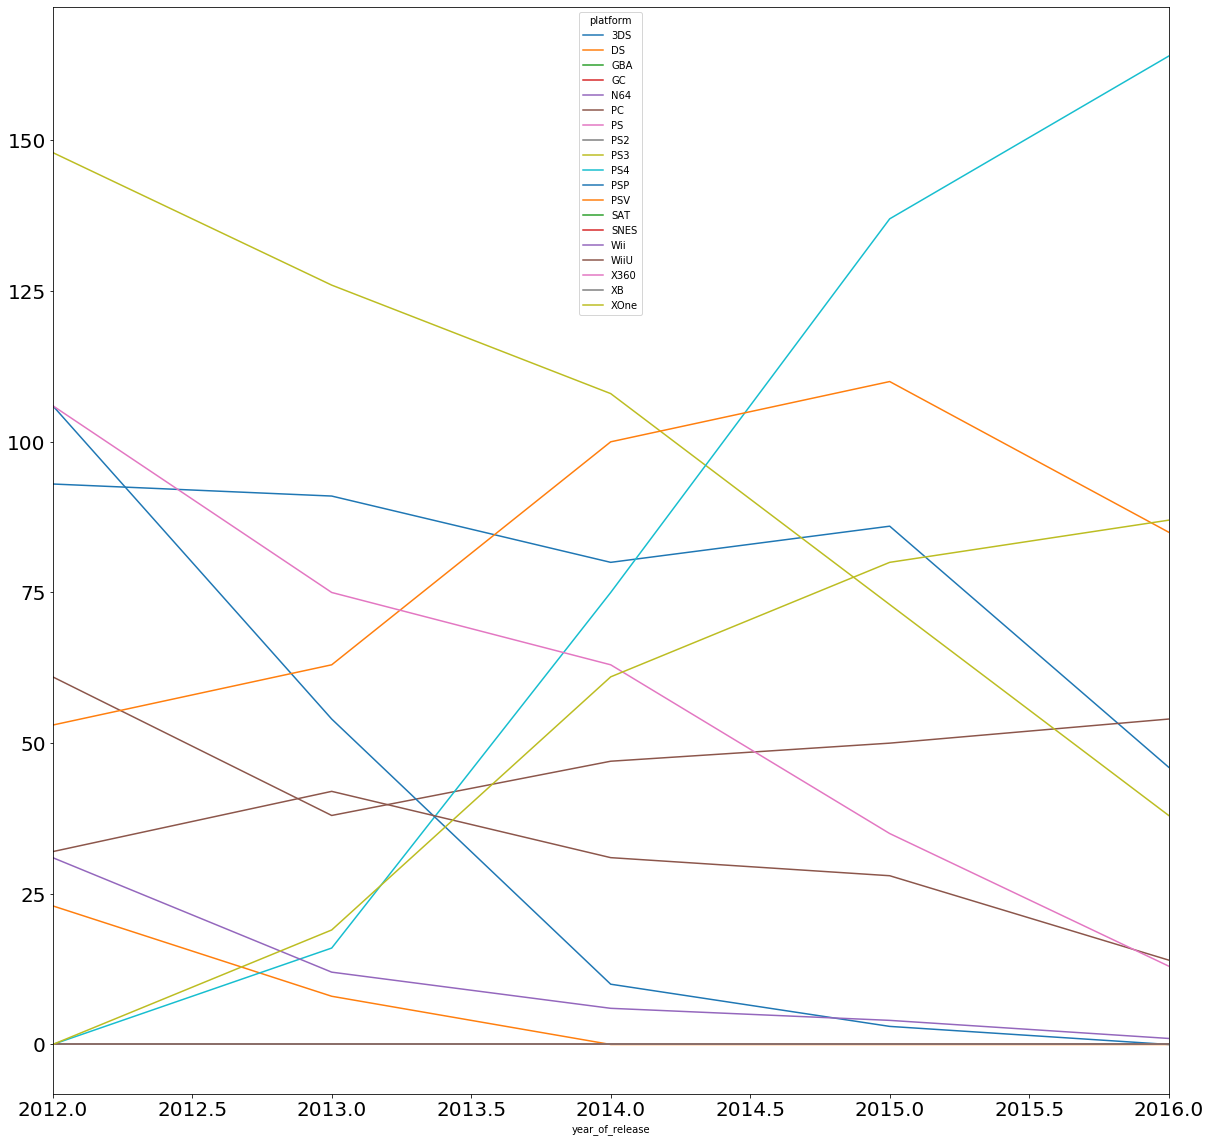

In [19]:
table_1 = table_1.query('year_of_release > 2011')
table_1.plot(figsize=(20,20), fontsize=20)

На основе графика можно сделать вывод: 

1) платформы, продажи которых падают: *3DS, PSV, PS3, WiiU*;

2) платформы, продажи которых растут: *PS4, XOne*;

3) платформы, которые проявляют стабильность: *PC*.

Потенциально прибыльными платформами являются: *PC, PS4, XOne*.

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Данные с продажами болле 10 млн. учитывать не стоит, т.к. они являются выбросами и их число не значительно:

In [20]:
print(df[df['sum_sales'] > 10].count())

name               9
platform           9
year_of_release    9
genre              9
na_sales           9
eu_sales           9
jp_sales           9
other_sales        9
critic_score       6
user_score         6
rating             9
sum_sales          9
dtype: int64


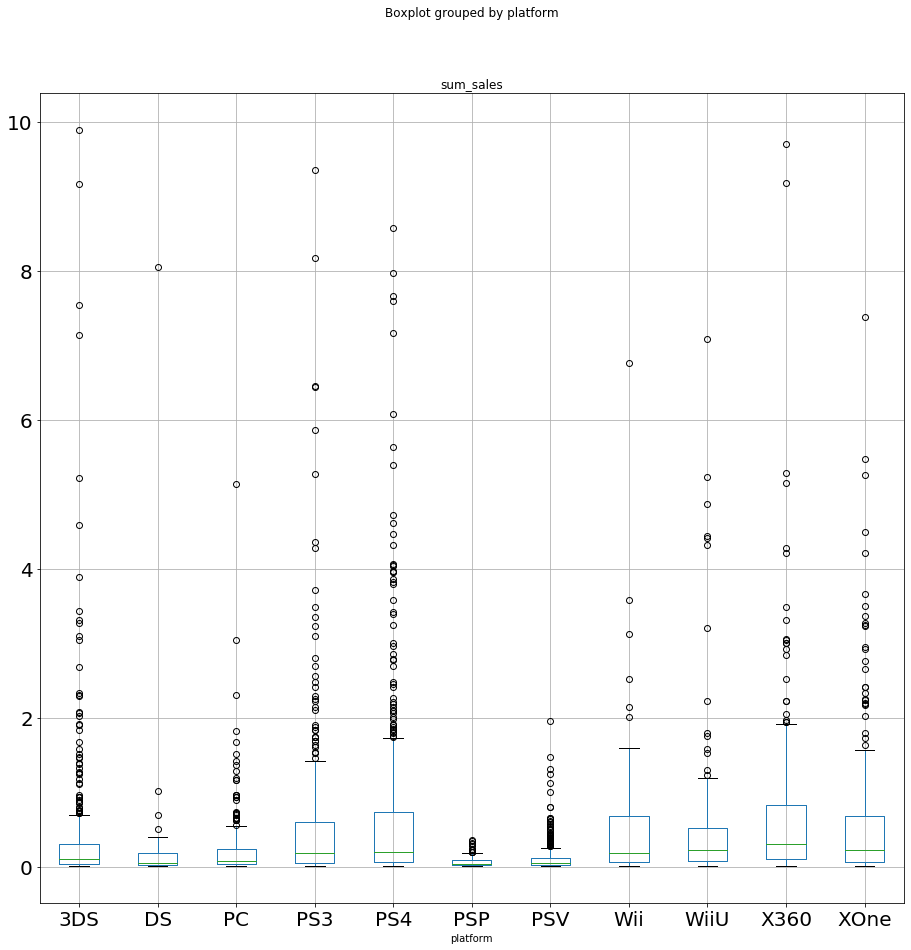

In [21]:
df_boxplot_10 = df.query('sum_sales < 10')
df_boxplot_10.boxplot(by='platform', column = 'sum_sales', figsize=(15,15), fontsize=20)

Исходя из графика можно сделать вывод, что разница в продажах между платформами не велика, медиана по продажам на всех платформах имеет значение в пределах от 0.1 млн. до 0.4 млн. Разница между платформами может возникнуть из-за того, что игры на портативные игровые платформы, такие как PSV, SAT, XB, стоят гораздо дешевле, также такие платформы менее популярны, следовательно средние продажи тоже будут меньше. На PC выходит огромное количество различных игр, большая часть которых стоит не дорого. Поэтому график распределения по глобальным продажам получается не равномерным.

Посмотрим, как влияют на продажи внутри одной популярной платформы (возьмем для примера PC) отзывы пользователей и критиков. Построим диаграмму рассеяния и диаграмму рассеяния по сотам:

**PC**

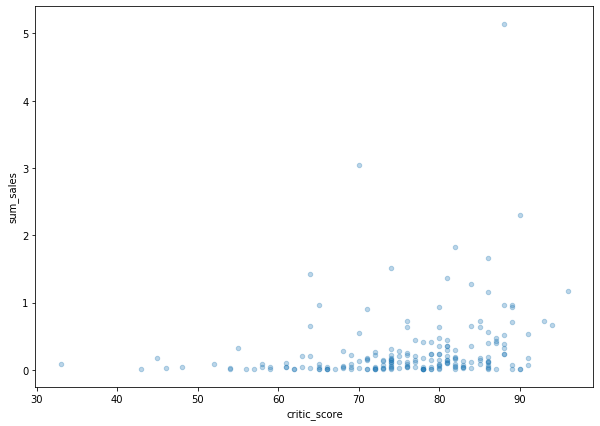

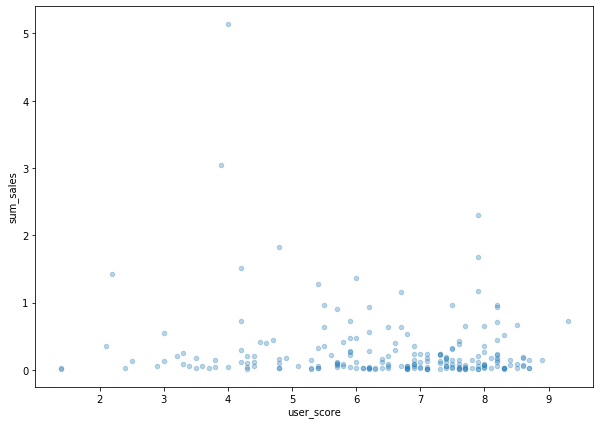

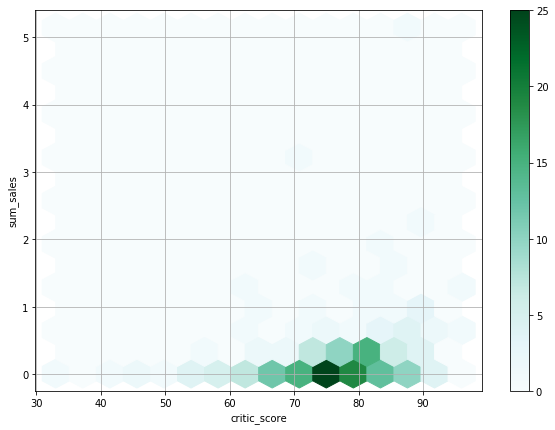

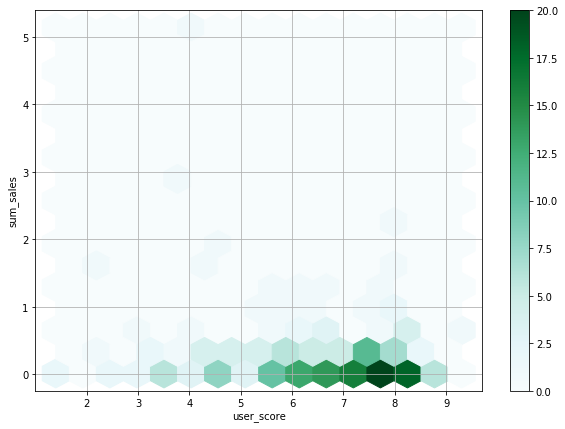

In [22]:
PC = df.query('platform == "PC"')
PC.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
PC.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
PC.plot(x = 'critic_score', y = 'sum_sales', kind='hexbin', gridsize=15, figsize=(10, 7), sharex=False, grid=True) 
PC.plot(x = 'user_score', y = 'sum_sales', kind='hexbin', gridsize=15, figsize=(10, 7), sharex=False, grid=True)

Посчитем средние значения оценок:

In [23]:
print('Средняя оценка критиков: {:.1f}'.format(PC['critic_score'].mean()))
print('Средняя оценка пользователей: {:.1f}'.format(PC['user_score'].mean()))
print('Средние суммарные продажи: {:.1f}'.format(PC['sum_sales'].mean()))

Средняя оценка критиков: 75.8
Средняя оценка пользователей: 6.4
Средние суммарные продажи: 0.3


Исходя из полученных результатов можно сделать вывод, что большая часть оценок критиков расположена в диапазоне (60 - 85), оценки пользователей (5,5 - 8,5). Продажи по большей части не превышают 0,5 млн. Наиболее частыми оценками критиков являются оценки около 74,3, у пользователей около 6,7.

Проанализируем другие актуальные платформы.

**PS4**

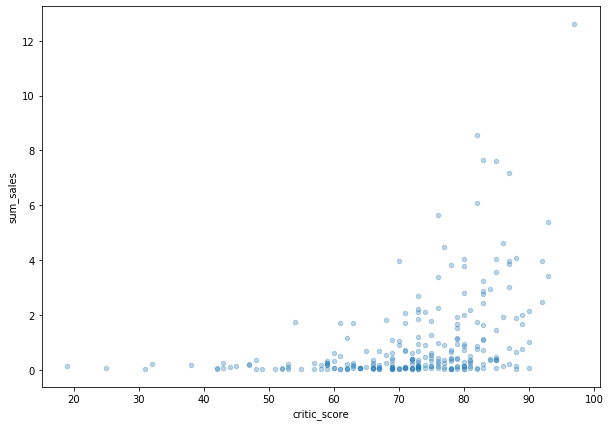

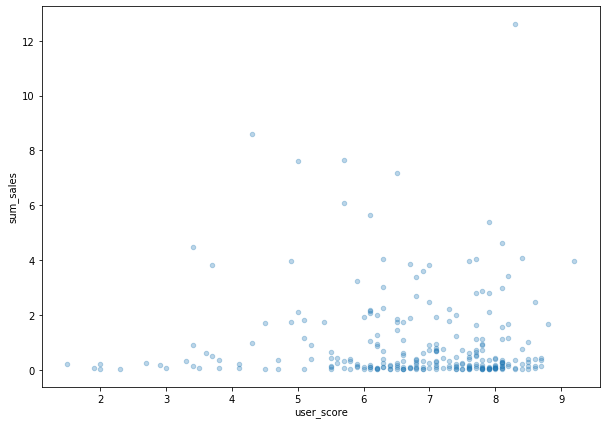

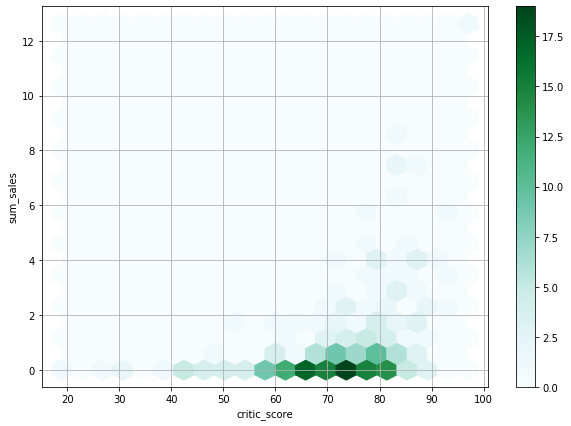

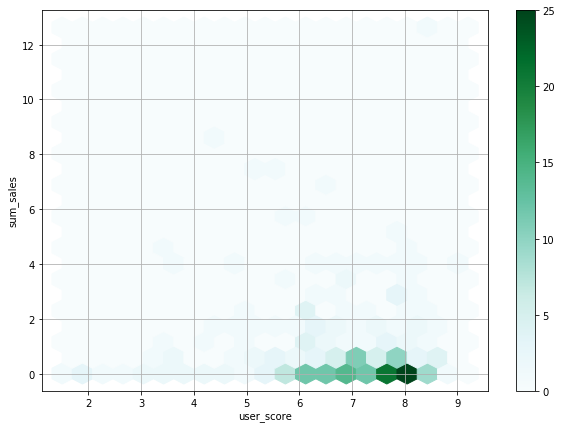

In [24]:
PS4 = df.query('platform == "PS4"')
PS4.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
PS4.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
PS4.plot(x = 'critic_score', y = 'sum_sales', kind='hexbin', gridsize=20, figsize=(10, 7), sharex=False, grid=True) 
PS4.plot(x = 'user_score', y = 'sum_sales', kind='hexbin', gridsize=20, figsize=(10, 7), sharex=False, grid=True)

Посчитем средние значения оценок:

In [25]:
print('Средняя оценка критиков: {:.1f}'.format(PS4['critic_score'].mean()))
print('Средняя оценка пользователей: {:.1f}'.format(PS4['user_score'].mean()))
print('Средние суммарные продажи: {:.1f}'.format(PS4['sum_sales'].mean()))

Средняя оценка критиков: 72.1
Средняя оценка пользователей: 6.7
Средние суммарные продажи: 0.8


Исходя из полученных результатов можно сделать вывод, что большая часть оценок критиков расположена в диапазоне (56 - 82), оценки пользователей (6 - 8,5). Продажи по большей части не превышают 1 млн. Наиболее частыми оценками критиков являются оценки около 72,1, у пользователей около 6,7.

**XOne**

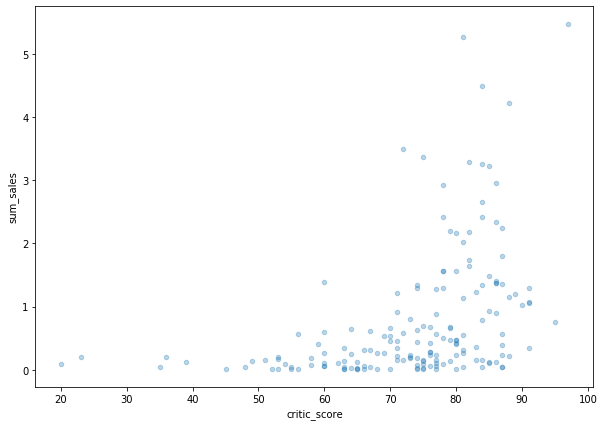

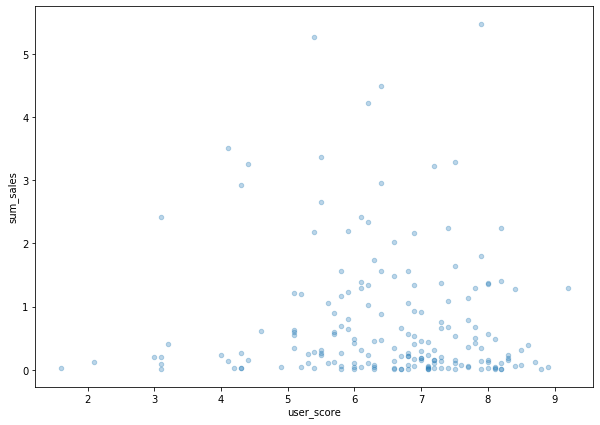

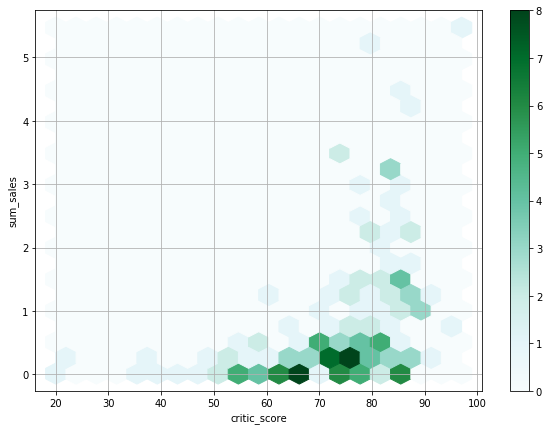

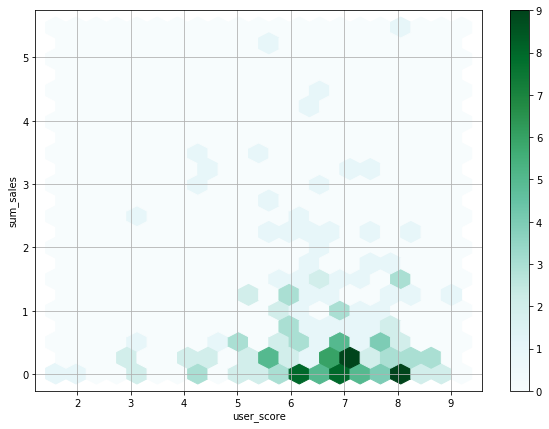

In [26]:
XOne = df.query('platform == "XOne"')
XOne.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
XOne.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
XOne.plot(x = 'critic_score', y = 'sum_sales', kind='hexbin', gridsize=20, figsize=(10, 7), sharex=False, grid=True) 
XOne.plot(x = 'user_score', y = 'sum_sales', kind='hexbin', gridsize=20, figsize=(10, 7), sharex=False, grid=True)

In [27]:
print('Средняя оценка критиков: {:.1f}'.format(XOne['critic_score'].mean()))
print('Средняя оценка пользователей: {:.1f}'.format(XOne['user_score'].mean()))
print('Средние суммарные продажи: {:.1f}'.format(XOne['sum_sales'].mean()))

Средняя оценка критиков: 73.3
Средняя оценка пользователей: 6.5
Средние суммарные продажи: 0.6


**3DS**

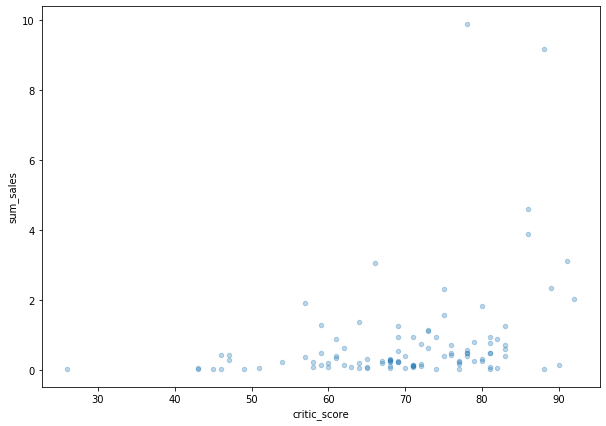

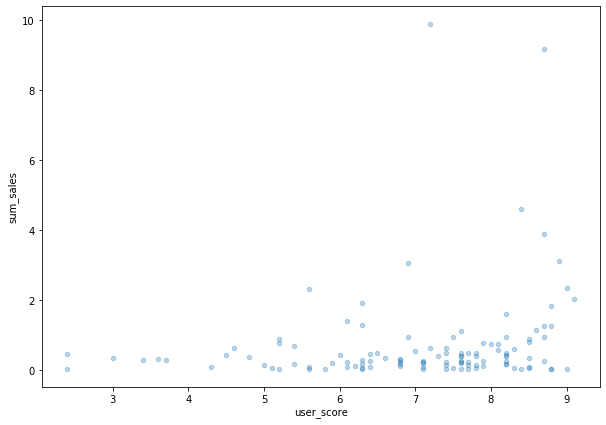

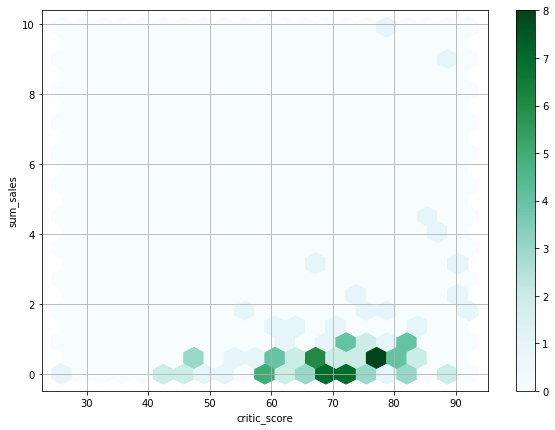

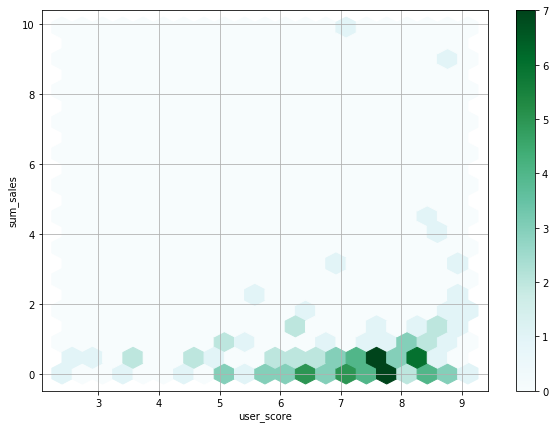

In [28]:
DS3 = df.query('platform == "3DS"')
DS3.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
DS3.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', figsize=(10, 7), sharex=False, alpha=0.3)
DS3.plot(x = 'critic_score', y = 'sum_sales', kind='hexbin', gridsize=20, figsize=(10, 7), sharex=False, grid=True) 
DS3.plot(x = 'user_score', y = 'sum_sales', kind='hexbin', gridsize=20, figsize=(10, 7), sharex=False, grid=True)

Посчитем средние значения оценок:

In [29]:
print('Средняя оценка критиков: {:.1f}'.format(DS3['critic_score'].mean()))
print('Средняя оценка пользователей: {:.1f}'.format(DS3['user_score'].mean()))
print('Средние суммарные продажи: {:.1f}'.format(DS3['sum_sales'].mean()))

Средняя оценка критиков: 69.8
Средняя оценка пользователей: 7.0
Средние суммарные продажи: 0.5


Исходя из полученных результатов можно сделать вывод, что большая часть оценок критиков расположена в диапазоне (55 - 85), оценки пользователей (5,5 - 8,5). Продажи по большей части не превышают 1 млн. Наиболее частыми оценками критиков являются оценки около 73,3, у пользователей около 6,5.

По результатам вышепреведенных данных актуальных платформ видно, что оценки на платформах XOne, PS4 и PC отличаются незначительно, но на платформе 3DS средние оценки критиков немного ниже, чем на других платформах, а средние оценки пользователей выше. На всех платформах, кроме 3DS, оценки критиков выше пользовательских. Средние суммарные продажи игр на платформах XOne, PS4, 3DS выше, чем на ПК (0.8 млн., 0.6 млн., 0.5 млн. против 0.2 млн.)

Вероятно, такие результаты обусловлены тем, что игровые платформы более удобны для пользователей игр, чем ПК. 

Посчитаем корреляцию между отзывами и продажами:

In [30]:
print(df['user_score'].corr(df['sum_sales']))
print(df['critic_score'].corr(df['sum_sales']))

0.004428817675493265
0.308196745920778


Как можно видеть корреляция между оценками критиков и продажами значительно выше корреляции между оценками пользователей и продажами (0.308 против 0.004). Однако, коэффициенты корреляции представлены незначительными значениями, из чего можно сделать вывод об отсутствии существенной зависимости оценок и продаж.

Посмотрим на общее распределение игр по жанрам:

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


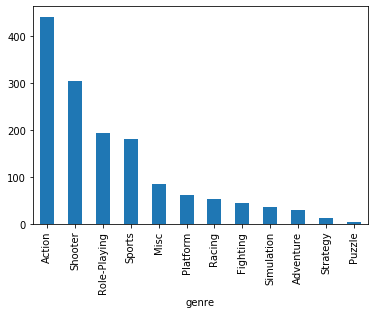

In [31]:
print(df.groupby('genre')['sum_sales'].sum().sort_values(ascending = False))
print(df.groupby('genre')['sum_sales'].sum().sort_values(ascending = False).plot(kind = 'bar'))

Самыми прибыльными жанрами являются: *Action, Role-Playing, Shooter.* Стоит отметить, что выделяются жанры с продажами на порядок ниже лидеров, такие как: *Adventure, Puzzle, Strategy*.

<a id='section_id3'></a> 
## Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Топ 5 самых популярных платформ в Северной Америке:


platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


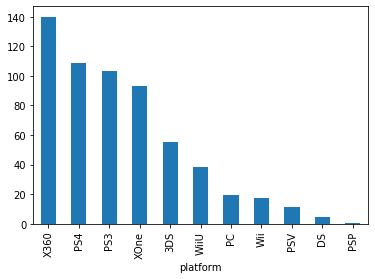

In [32]:
print(df.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5))
print(df.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')) 

Топ 5 самых популярных платформ в Европе:

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


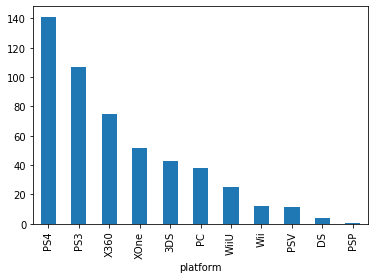

In [33]:
print(df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5))
print(df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')) 

Топ 5 самых популярных платформ в Японии:

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


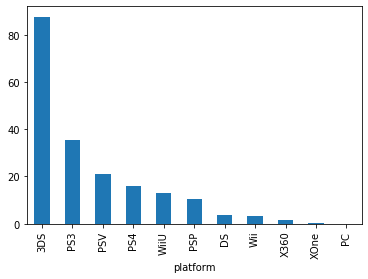

In [34]:
print(df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5))
print(df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')) 

Можно сделать вывод, что во всех 3-х регионах в топ-5 самых популярных платформ входит PS3. Доля лидеров по продажам везде разная. Лидером по продажам в Северной Америке является Х360, в Европе - PS4, в Японии с большим отрывом - 3DS. Судя по графикам, картина продаж среди лидеров в Северной Америке и Европе схожа, существенного преимущества по продажам какой-либо платформы нет, в Японии почти половину рынка заняла платформа 3DS, что обусловлено успехом прошлой версии платформы - DS.

Самые популярные жанры (топ-5)

Топ 5 самых популярных жанров в Северной Америке:

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


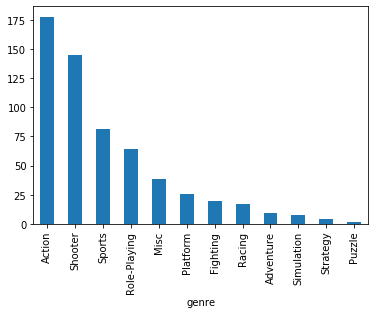

In [35]:
print(df.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5))
print(df.groupby('genre')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')) 

Топ 5 самых популярных жанров в Европе:

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


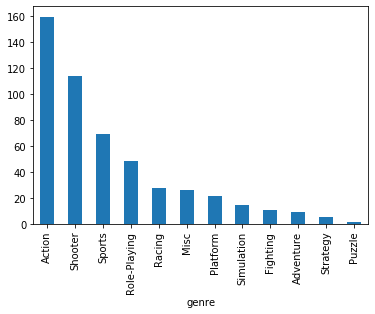

In [36]:
print(df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5))
print(df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')) 


Топ 5 самых популярных жанров в Японии:


genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


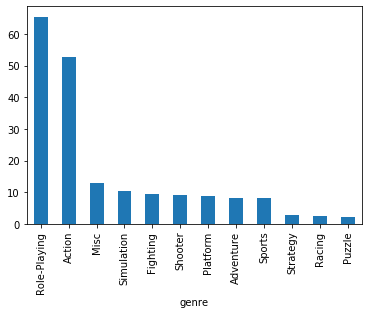

In [37]:
print(df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5))
print(df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')) 

Исходя из графиков можно сделать вывод, что в Европе и Северной Америке схожие предпочтения по жанрам. Пользователи в этих регионах предпочитают жанры Action, Sports, Shooter, особую популярность имеет жанр Action. В Японии наблюдается немного иная картина: здесь лидерами, занимая значительную часть рынка, являются жанры Role-Playing и Action, также в топ-3 в регионе, в отличии от Европы и Америки, входит жанр Misc. Жанры популярные в Европе и Северной Америке, а именно Shooter и Sports, в тройку лидеров в Японии не попали.

Такое различие обусловлено популярностью в Японии особого жанра Japanese Role-Playing Game или JRPG. Игры этого жанра имеют схожие, узнаваемые особенности стиля, подачи сюжета и игровой механики, разительно отличающие их от RPG «западного образца».

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

rating
M              231.57
E              114.37
not_defined    103.31
E10+            75.70
T               66.02
Name: na_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


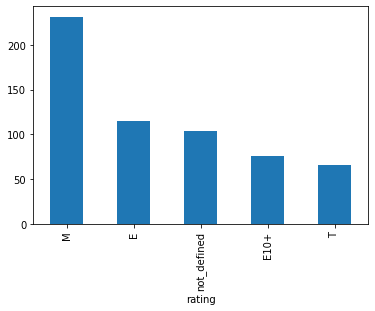

In [38]:
print(df.groupby('rating')['na_sales'].sum().sort_values(ascending = False))
print(df.groupby('rating')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'bar'))

rating
M              193.96
E              113.03
not_defined     91.50
E10+            55.37
T               52.96
Name: eu_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


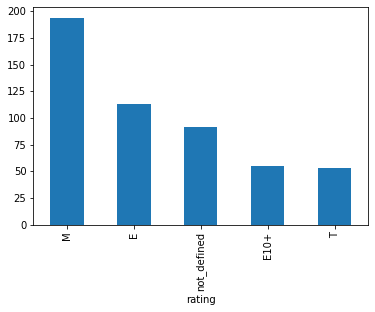

In [39]:
print(df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False))
print(df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'bar'))

rating
not_defined    108.84
E               28.33
T               26.02
M               21.20
E10+             8.19
Name: jp_sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


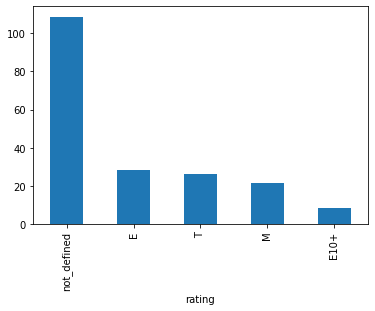

In [40]:
print(df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False))
print(df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'bar'))

Распределение по долям рейтингов во всех регионах похожее, за исключением того, что в Японии больше игр с рейтингом T, но меньше с рейтингом M, также в этом регионе значительная часть игр, у которых рейтинг не указан (возможно из-за того, что возрастными рейтингами в Японии занимается некоммерческая организация CERO, также в этом регионе популярен жанр JRPG и рейтинг игр этого жанра может быть не определен американской ESRB и европейской PEGI). Отсюда можно сделать вывод, что в Японии более популярны игры для подростков, и менее популярны игры, которые не подходят для возрастной категории младше 17, в которых присутствуют откровенные сцены и сцены жестокого насилия. Таким образом рейтинг ESRB оказывает влияние на продажи в регионе.

<a id='section_id4'></a> 
##  Исследование статистических показателей

Проверим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.

Посчитаем средние оценки по жанрам:

In [41]:
genre_critic_score_mean = df.groupby('genre')['critic_score'].mean().sort_values(ascending = False)
genre_user_score_mean = df.groupby('genre')['user_score'].mean().sort_values(ascending = False)

AxesSubplot(0.125,0.125;0.775x0.755)


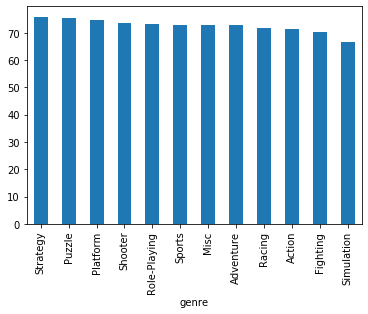

In [42]:
print(genre_critic_score_mean.plot(kind = 'bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


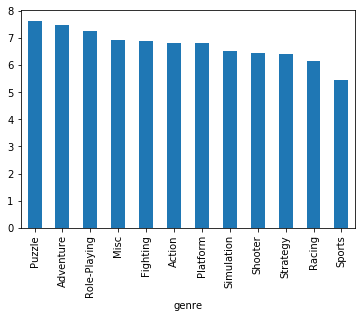

In [43]:
print(genre_user_score_mean.plot(kind = 'bar'))

Получается, что самый рейтинговый жанр у пользователей - Puzzle, у критиков - это Strategy. Самый не любимый у критиков жанр - Simulation, у пользователей - Sports.

Посчитаем дисперсию:

In [44]:
genre_critic_score_var = df.groupby('genre')['critic_score'].var().sort_values(ascending = False)
genre_user_score_var = df.groupby('genre')['user_score'].var().sort_values(ascending = False)

Найдем стандартное отклонение:

In [45]:
genre_critic_score_std = df.groupby('genre')['critic_score'].std().sort_values(ascending = False)
genre_user_score_std = df.groupby('genre')['user_score'].std().sort_values(ascending = False)

Занесем все данные в общую таблицу:

In [46]:
genre_stat = pd.concat([genre_critic_score_mean, genre_user_score_mean, genre_critic_score_var, genre_user_score_var, genre_critic_score_std, genre_user_score_std], axis=1)
genre_stat = genre_stat.rename(columns={"critic_score": 'critic', "user_score": 'user'})
genre_stat.columns = pd.MultiIndex.from_tuples(zip(['mean', 'mean','variance', 'variance', 'standard deviation', 'standard deviation'], genre_stat.columns))
display(genre_stat)

mean              variance           standard deviation  \
                 critic      user      critic      user             critic   
Action        71.378440  6.825048  146.258753  1.889084          12.093748   
Adventure     72.661017  7.466667  121.021040  1.632394          11.000956   
Fighting      70.406250  6.895714  179.768849  2.048532          13.407791   
Misc          72.807018  6.938806  101.087093  1.582411          10.054208   
Platform      74.610169  6.806061  188.069550  2.737193          13.713845   
Puzzle        75.444444  7.633333   48.277778  0.790000           6.948221   
Racing        71.864198  6.151163  157.343827  2.780881          12.543677   
Role-Playing  73.049689  7.258480  150.860016  1.634913          12.282509   
Shooter       73.421965  6.435897  154.884864  2.065509          12.445275   
Simulation    66.615385  6.511905  183.769231  3.285465          13.556151   
Sports        72.895105  5.455897  239.418497  3.022890          15.473154   
Strategy      75.870968  6.420000  156.649462  4.124588          12.515968   

                        
                  user  
Action        1.374440  
Adventure     1.277652  
Fighting      1.431269  
Misc          1.257939  
Platform      1.654447  
Puzzle        0.888819  
Racing        1.667597  
Role-Playing  1.278637  
Shooter       1.437188  
Simulation    1.812585  
Sports        1.738646  
Strategy      2.030908

Построим гистограмму и диаграмму рассеяния для всех жанров:

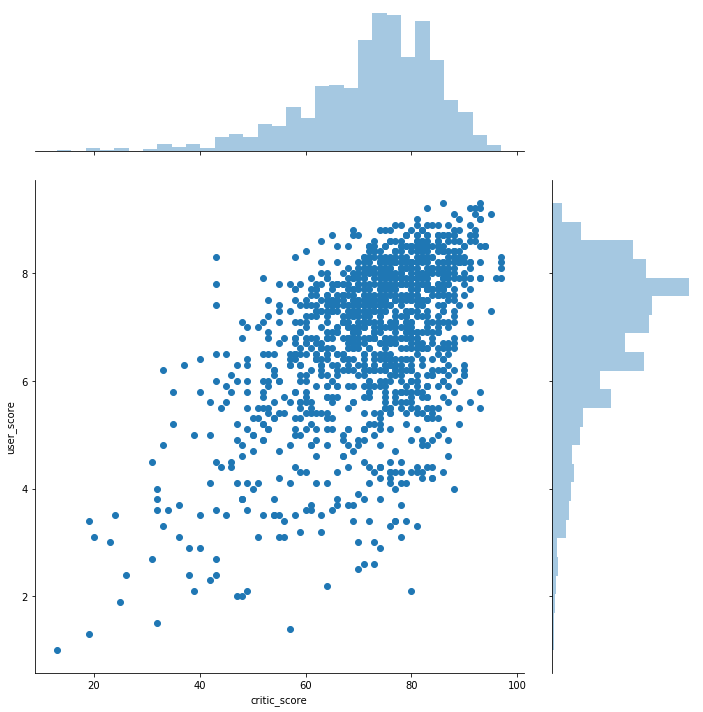

In [47]:
sns.jointplot(data=df, x="critic_score", y="user_score", height=10, ratio=3)

Распределение оценок похоже на нормальное с пиковыми значениями у critic_score - 8, у user_score - 78. Для того, чтобы узнать как распределены оценки по жанрам построим следующие гистограммы:

genre
Action          AxesSubplot(0.125,0.125;0.775x0.755)
Adventure       AxesSubplot(0.125,0.125;0.775x0.755)
Fighting        AxesSubplot(0.125,0.125;0.775x0.755)
Misc            AxesSubplot(0.125,0.125;0.775x0.755)
Platform        AxesSubplot(0.125,0.125;0.775x0.755)
Puzzle          AxesSubplot(0.125,0.125;0.775x0.755)
Racing          AxesSubplot(0.125,0.125;0.775x0.755)
Role-Playing    AxesSubplot(0.125,0.125;0.775x0.755)
Shooter         AxesSubplot(0.125,0.125;0.775x0.755)
Simulation      AxesSubplot(0.125,0.125;0.775x0.755)
Sports          AxesSubplot(0.125,0.125;0.775x0.755)
Strategy        AxesSubplot(0.125,0.125;0.775x0.755)
Name: user_score, dtype: object


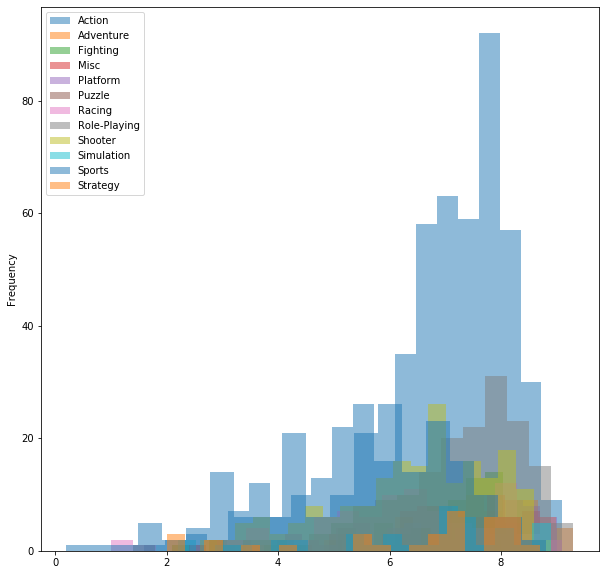

In [48]:
print(df.groupby('genre')['user_score'].plot(kind = 'hist', bins = 20, legend = True, mark_right= True, figsize=(10,10), fontsize=10, alpha = 0.5))

genre
Action          AxesSubplot(0.125,0.125;0.775x0.755)
Adventure       AxesSubplot(0.125,0.125;0.775x0.755)
Fighting        AxesSubplot(0.125,0.125;0.775x0.755)
Misc            AxesSubplot(0.125,0.125;0.775x0.755)
Platform        AxesSubplot(0.125,0.125;0.775x0.755)
Puzzle          AxesSubplot(0.125,0.125;0.775x0.755)
Racing          AxesSubplot(0.125,0.125;0.775x0.755)
Role-Playing    AxesSubplot(0.125,0.125;0.775x0.755)
Shooter         AxesSubplot(0.125,0.125;0.775x0.755)
Simulation      AxesSubplot(0.125,0.125;0.775x0.755)
Sports          AxesSubplot(0.125,0.125;0.775x0.755)
Strategy        AxesSubplot(0.125,0.125;0.775x0.755)
Name: critic_score, dtype: object


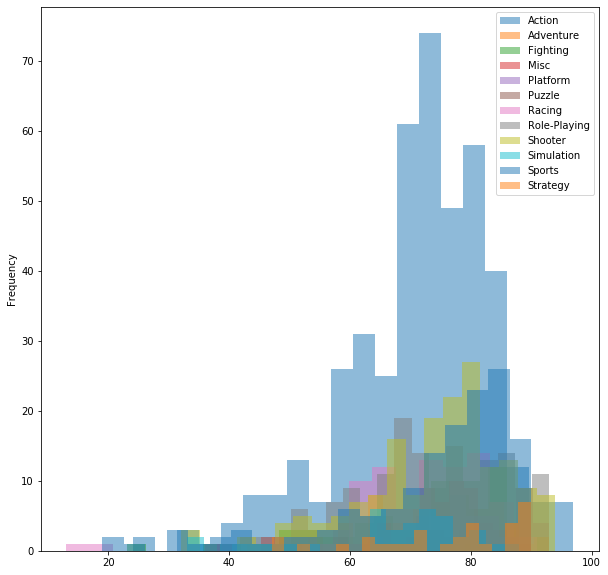

In [49]:
print(df.groupby('genre')['critic_score'].plot(kind = 'hist', bins = 20, legend = True, mark_right= True, figsize=(10,10), fontsize=10, alpha = 0.5))

На графиках выше видно, что распределение оценок во всех жанрах имеет схожую картину. Для большинства жанров мы имеем скошенные влево распределения, можно предположить, что получить оценку пользователей выше 9 или оценку критиков выше 85 очень сложно, в то же время средие оценки достаточно высокие, врезультате чего мы получаем "крутой обрыв" справа и распределение становится скошенным влево.

<a id='section_id5'></a> 
## Проверка гипотез

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Сперва нужно убрать пропуски в столбце user_score, для этого создадим новую таблицу df_user_score, в которой удалим все строки с пропущенными значениями в столбце user_score:

Подготовим срезы данных для Xbox One и PC:

In [50]:
df_user_score = df.dropna(subset=['user_score']).reset_index(drop = True)
df_user_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 12 columns):
name               1531 non-null object
platform           1531 non-null object
year_of_release    1531 non-null float64
genre              1531 non-null object
na_sales           1531 non-null float64
eu_sales           1531 non-null float64
jp_sales           1531 non-null float64
other_sales        1531 non-null float64
critic_score       1297 non-null float64
user_score         1531 non-null float64
rating             1531 non-null object
sum_sales          1531 non-null float64
dtypes: float64(8), object(4)
memory usage: 143.7+ KB


Подготовим срезы данных для Xbox One и PC:

In [51]:
Xbox = df_user_score.query('platform == "XOne"')
PC = df_user_score.query('platform == "PC"')

Сформулируем нулевую гипотезу, она звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Проверим гипотезу с пороговым значением альфа = 0.05:

In [52]:
alpha = 0.05 

results = st.ttest_ind(Xbox.user_score, PC.user_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value (0.55) говорит о том, что отвергнуть нулевую гипотезу не получилось. Нулевой гипотезой будет являться следующее выражение: "Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые". Нулевая гипотеза и будет являться достоверной.

**Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

Сформулируем нулевую гипотезу, она звучит так: "Пользовательские рейтинги жанров Action и Sports одинаковые".

In [53]:
Action = df_user_score.query('genre == "Action"')
Sports = df_user_score.query('genre == "Sports"')

In [54]:
alpha = 0.05 

results2 = st.ttest_ind(Action.user_score, Sports.user_score)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Полученное значение p-value (3.72e-26) говорит о том, что можно с уверенностью отвергать нулевую гипотезу. Альтернативной гипотезой будет являться следующее выражение: "Средние пользовательские рейтинги жанров *Action* и *Sports* разные". Альтернативная гипотеза будет являться достоверной.

# Вывод

Перед выполнением работы была поставлена задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные были взяты из открытых источников с 1980 по 2016 годы.

**Сперва данные были подготовлены для работы с ними:** названия столбцов были приведены к нижнему регистру, данные преобразованы в нужные типы (user_score из типа object в float64), в столбце *rating* недостающие значения заменены на "not_defined".

**Был проведен исследовательский анализ данных. По результатам можно сделать следующие выводы:**
- Наибольшее количество игр выпускалось в период с 2006 по 2011 годы, пик пришелся на 2008 год;
- Период "жизни" игровых платформ составляет около 8,5 лет (за исключением PC);
- Актуальный период развития игровой индустриии начинается с 2012 года, когда наблюдалось резкое падение продаж консолей и других игровых устройств более чем на 30%. Падение продаж видеоигр объясняется тем, что потребители стали чаще покупать игры для мобильных устройств, а также играть через социальные сети; 
- Потенциально прибыльнsми платформами являются: PC, PS4, XOne;
- Разница в продажах между платформами не велика, медиана по продажам на всех платформах имеет значение в пределах от 0.1 млн. до 0.4 млн. Разница между платформами может возникнуть из-за того, что игры на портативные игровые платформы, такие как PSV, SAT, XB, стоят гораздо дешевле, также такие платформы менее популярны, следовательно средние продажи тоже будут меньше. На PC выходит огромное количество различных игр, большая часть которых стоит не дорого.;
- По результатам вышепреведенных данных актуальных платформ видно, что оценки на платформах XOne, PS4 и PC отличаются незначительно, но на платформе 3DS средние оценки критиков немного ниже, чем на других платформах, а средние оценки пользователей выше. На всех платформах, кроме 3DS, оценки критиков выше пользовательских. Средние суммарные продажи игр на платформах XOne, PS4, 3DS выше, чем на ПК (0.8 млн., 0.6 млн., 0.5 млн. против 0.2 млн.). Вероятно, такие результаты обусловлены тем, что игровые платформы более удобны для пользователей игр, чем ПК.
- Средние суммарны продажи по большей части не превышают 1 млн;
- Наиболее частыми оценками критиков являются оценки около 78, у пользователей около 8;
- Корреляция между оценками критиков и продажами значительно выше корреляции между оценками пользователей и продажами (0.308 против 0.004);
- Отсутствует существенная зависимость между оценками и продажами;
- Самыми прибыльными жанрами являются: Action, Role-Playing, Shooter. Стоит отметить, что выделяются жанры с продажами на порядок ниже лидеров, такие как: Adventure, Puzzle, Strategy.


**Был составлен портрет пользователя каждого региона (NA, EU, JP) и сделаны следующие выводы:**
- Во всех 3-х регионах в топ-5 самых популярных платформ входит PS3. Доля лидеров по продажам везде разная. Лидером по продажам в Северной Америке является Х360, в Европе - PS4, в Японии с большим отрывом - 3DS. Судя по графикам, картина продаж среди лидеров в Северной Америке и Европе схожа, существенного преимущества по продажам какой-либо платформы нет, в Японии почти половину рынка заняла платформа 3DS, что обусловлено успехом прошлой версии платформы - DS;
- Исходя из графиков можно сделать вывод, что в Европе и Северной Америке схожие предпочтения по жанрам. Пользователи в этих регионах предпочитают жанры Action, Sports, Shooter, особую популярность имеет жанр Action. В Японии наблюдается немного иная картина: здесь лидерами, занимая значительную часть рынка, являются жанры Role-Playing и Action, также в топ-3 в регионе, в отличии от Европы и Америки, входит жанр Misc. Жанры популярные в Европе и Северной Америке, а именно Shooter и Sports, в тройку лидеров в Японии не попали. Такое различие обусловлено популярностью в Японии особого жанра Japanese Role-Playing Game или JRPG. Игры этого жанра имеют схожие, узнаваемые особенности стиля, подачи сюжета и игровой механики, разительно отличающие их от RPG «западного образца»;
- Распределение по долям рейтингов во всех регионах похожее, за исключением того, что в Японии больше игр с рейтингом T, но меньше с рейтингом M, также в этом регионе значительная часть игр у которых рейтинг не указан (возможно из-за того, что возрастными рейтингами в Японии занимается некоммерческая организация CERO, также в этом регионе популярен жанр JRPG и рейтинг игр этого жанра может быть не определен американской ESRB и европейской PEGI). Отсюда можно сделать вывод, что в Японии более популярны игры для подростков, и менее популярны игры, которые не подходят для возрастной категории младше 17, в которых присутствуют откровенные сцены и сцены жестокого насилия. Таким образом рейтинг ESRB оказывает влияние на продажи в регионе.

**Проведено исследование статистических показателей, выводы следующие:**
- Cамый рейтинговый жанр у пользователей - Puzzle, у критиков - это Strategy. Самый не любимый у критиков жанр - Simulation, у пользователей - Sports.;
- Распределение оценок похоже на нормальное с пиковыми значениями у critic_score - 8, у user_score - 78;
- На графиках видно, что распределение оценок во всех жанрах имеет схожую картину. Для большинства жанров мы имеем скошенные влево распределения, можно предположить, что получить оценку пользователей выше 9 или оценку критиков выше 85 очень сложно, в то же время средие оценки достаточно высокие, врезультате чего мы получаем "крутой обрыв" справа и распределение становится скошенным влево.

**Были проверены следующие гипотезы:**

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Полученное значение p-value (0.55) говорит о том, что отвергнуть нулевую гипотезу не получилось. Нулевой гипотезой будет являться следующее выражение: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Нулевая гипотеза и будет являться достоверной.

2) Средние пользовательские рейтинги жанров Action и Sports разные.
- Полученное значение p-value (3.72e-26) говорит о том, что можно с уверенностью отвергать нулевую гипотезу. Альтернативной гипотезой будет являться следующее выражение: "Средние пользовательские рейтинги жанров Action и Sports разные". Альтернативная гипотеза будет являться достоверной.